# Load Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
data = load_wine()   
df = pd.DataFrame( data['data'], columns=data['feature_names'])

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [9]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [10]:
target=data['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [11]:
features=df
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


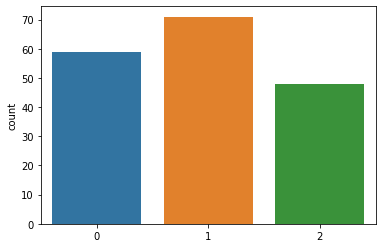

In [12]:
sns.countplot(data['target'])
plt.show()



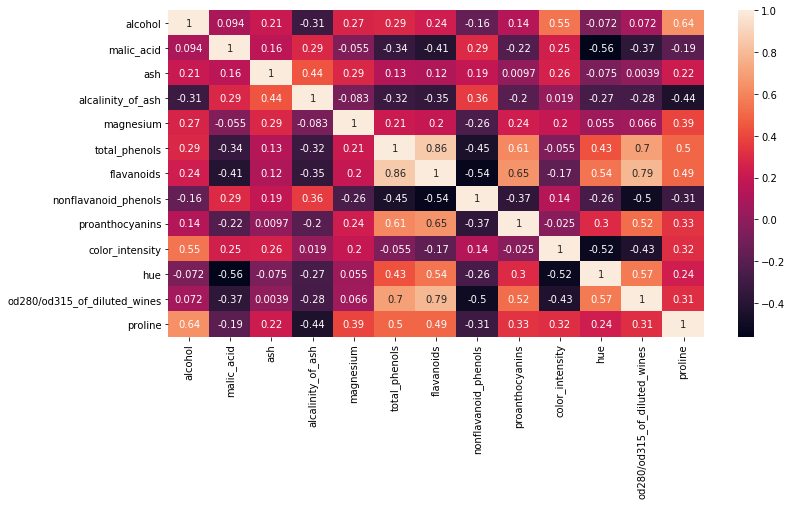

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

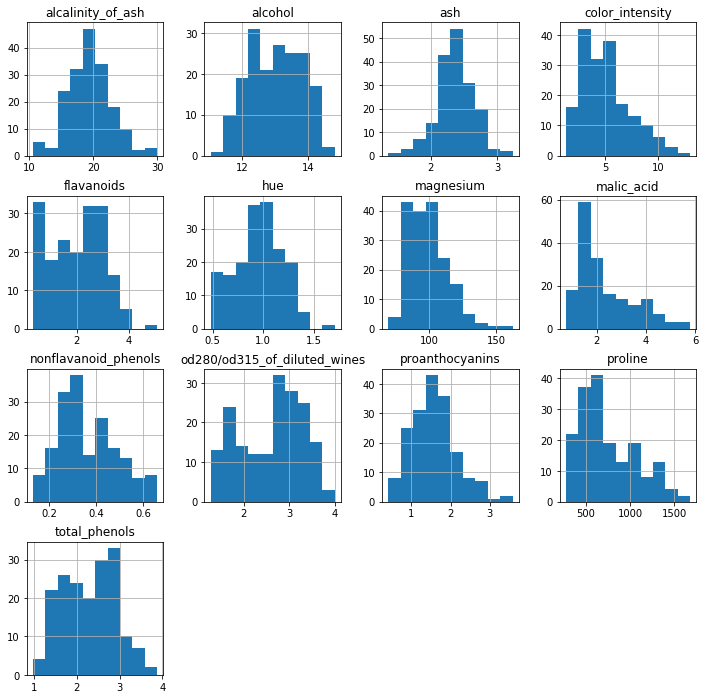

In [14]:
df.hist(figsize=(12,12));

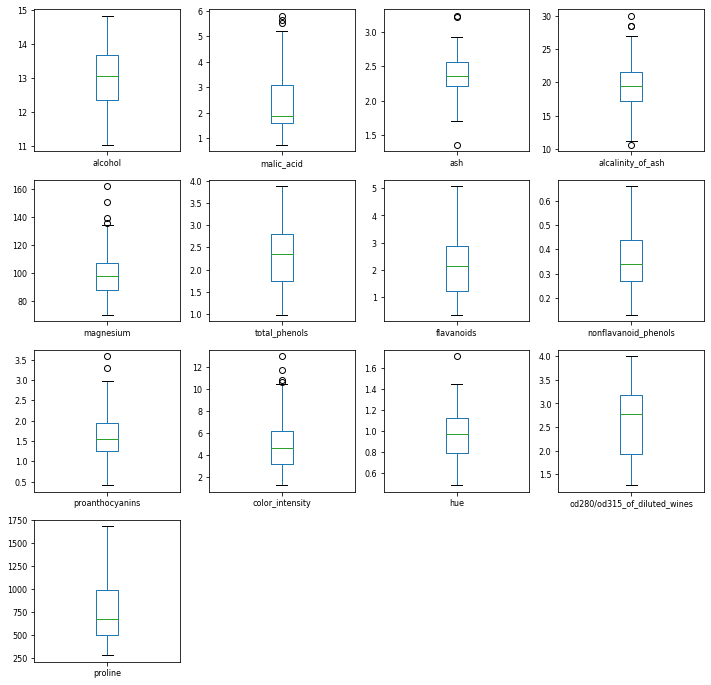

In [15]:
df.plot(kind='box',subplots=True,layout=(4,4), fontsize=8, figsize=(12,12));

In [16]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20)

In [17]:
x_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [18]:
y_train[:5]

array([2, 1, 2, 0, 0])

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)

D:\Users\V130\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
pred = model.predict(x_test)
pred[:5]


array([1, 1, 1, 0, 2])

In [21]:
y_test[:5]

array([1, 1, 0, 0, 2])

In [22]:
print(confusion_matrix(y_test,pred))

[[14  1  0]
 [ 0 12  0]
 [ 0  1  8]]


In [23]:
print(accuracy_score(y_test,pred)*100)

94.44444444444444


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.86      1.00      0.92        12
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



In [25]:
cnf = pd.DataFrame(confusion_matrix(y_test, pred), columns=['Class 0', 'Class 1','class 2'], index=['Class 0', 'Class 1','class 2'])
cnf

,Class 0,Class 1,class 2
Class 0,14,1,0
Class 1,0,12,0
class 2,0,1,8


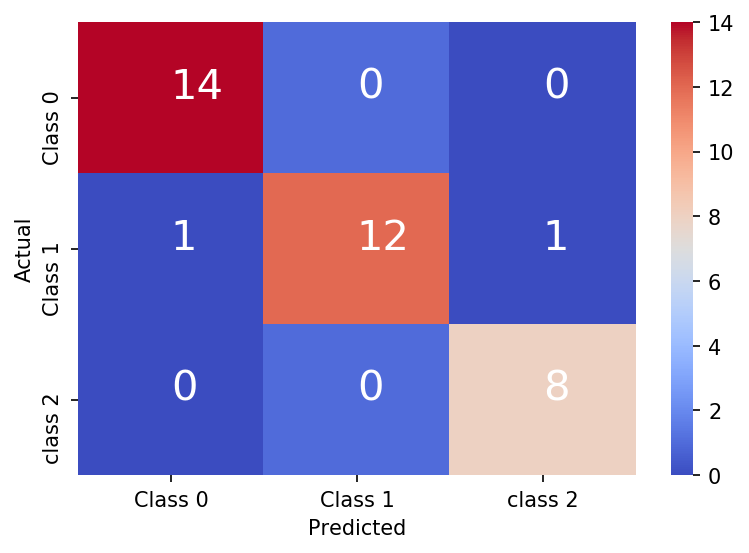

In [26]:
plt.figure(dpi=150)
sns.heatmap(cnf, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(0, 3):
    for j in range(0, 3):
        plt.text(i+0.5, j+0.5, cnf.iloc[i, j], color='white', fontsize=20)
plt.show()

In [27]:
import pickle
fp = open('Wine.pk1','wb')
pickle.dump(model,fp)
fp.close()

In [28]:
import tkinter as tk
import PIL.Image
import PIL.ImageTk

with open('Wine.pk1', 'rb') as fp:
    model = pickle.load(fp)
    fp.close()
    
root=tk.Tk()
root.title('Quality of Wine')

canvas = tk.Canvas(root, height=600, width=700)

im = PIL.Image.open("14695.jpg")
photo = PIL.ImageTk.PhotoImage(im)
background_label = tk.Label(root, image=photo)
background_label.place(relx=0, rely=0, relwidth=1, relheight=1)

canvas.pack()

alcohol=tk.DoubleVar()
malic_acid=tk.DoubleVar()
ash=tk.DoubleVar()
alcalinity_of_ash=tk.DoubleVar()
magnesium=tk.DoubleVar()
total_phenols=tk.DoubleVar()
flavanoids=tk.DoubleVar()
nonflavanoid_phenols=tk.DoubleVar()
proanthocyanins=tk.DoubleVar()
color_intensity=tk.DoubleVar()
hue=tk.DoubleVar()
diluted_wines=tk.DoubleVar()
proline=tk.DoubleVar()

l=tk.Label(root,text="Your Wine's Quality")
l.config(bg='#030200',fg='#FFFFFF', font=('Courier', 20, 'bold'))
l.place(relx=0.5, rely=0.02, relwidth=0.5, relheight=0.1, anchor='n')

frame = tk.Frame(root, bg='#030200', bd=10)
frame.place(relx=0.3, rely=0.15, relwidth=0.55, relheight=0.6, anchor='n')

l1 = tk.Label(frame, text="Alcohol"+" : ")
l1.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l1.place(relx=0, rely=0, relwidth=0.22, relheight=0.1)

e1 = tk.Entry(frame,textvariable=alcohol,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e1.place(relx=0.2, rely=0, relwidth=0.15, relheight=0.1)

l2 = tk.Label(frame, text="Malic Acid"+" : ")
l2.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l2.place(relx=0.5, rely=0, relwidth=0.28, relheight=0.1)

e2 = tk.Entry(frame,textvariable=malic_acid,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e2.place(relx=0.75, rely=0, relwidth=0.15, relheight=0.1)

l3 = tk.Label(frame, text="Ash"+" : ")
l3.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l3.place(relx=0, rely=0.15, relwidth=0.22, relheight=0.1)

e3 = tk.Entry(frame,textvariable=ash,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e3.place(relx=0.2, rely=0.15, relwidth=0.15, relheight=0.1)

l4 = tk.Label(frame, text="Alcanity"+" : ")
l4.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l4.place(relx=0.5, rely=0.15, relwidth=0.22, relheight=0.1)

e4 = tk.Entry(frame,textvariable=alcalinity_of_ash,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e4.place(relx=0.7, rely=0.15, relwidth=0.15, relheight=0.1)

l5 = tk.Label(frame, text="Magnesium"+" : ")
l5.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l5.place(relx=0, rely=0.3, relwidth=0.25, relheight=0.1)

e5 = tk.Entry(frame,textvariable=magnesium,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e5.place(relx=0.2, rely=0.3, relwidth=0.15, relheight=0.1)

l6 = tk.Label(frame, text="Phenols"+" : ")
l6.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l6.place(relx=0.5, rely=0.3, relwidth=0.2, relheight=0.1)

e6 = tk.Entry(frame,textvariable=total_phenols,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e6.place(relx=0.7, rely=0.3, relwidth=0.15, relheight=0.1)

l7 = tk.Label(frame, text="Flavanoids"+" : ")
l7.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l7.place(relx=0, rely=0.45, relwidth=0.25, relheight=0.1)

e7 = tk.Entry(frame,textvariable=flavanoids,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e7.place(relx=0.2, rely=0.45, relwidth=0.15, relheight=0.1)

l8 = tk.Label(frame, text="Non Flavanoid"+" : ")
l8.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l8.place(relx=0.5, rely=0.45, relwidth=0.32, relheight=0.1)

e8 = tk.Entry(frame,textvariable=nonflavanoid_phenols,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e8.place(relx=0.8, rely=0.45, relwidth=0.15, relheight=0.1)

l9 = tk.Label(frame, text="Proanthocyanins"+" : ")
l9.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l9.place(relx=0, rely=0.6, relwidth=0.35, relheight=0.1)

e9 = tk.Entry(frame,textvariable=proanthocyanins,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e9.place(relx=0.3, rely=0.6, relwidth=0.15, relheight=0.1)

l10 = tk.Label(frame, text="Color Intensity"+" : ")
l10.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l10.place(relx=0.5, rely=0.6, relwidth=0.35, relheight=0.1)

e10 = tk.Entry(frame,textvariable=color_intensity,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e10.place(relx=0.8, rely=0.6, relwidth=0.15, relheight=0.1)

l11 = tk.Label(frame, text="Hue"+" : ")
l11.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l11.place(relx=0, rely=0.75, relwidth=0.2, relheight=0.1)

e11 = tk.Entry(frame,textvariable=hue,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e11.place(relx=0.2, rely=0.75, relwidth=0.15, relheight=0.1)

l12 = tk.Label(frame, text="diluted_wines"+" : ")
l12.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l12.place(relx=0.5, rely=0.75, relwidth=0.4, relheight=0.1)

e12 = tk.Entry(frame,textvariable=diluted_wines,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e12.place(relx=0.85, rely=0.75, relwidth=0.15, relheight=0.1)

l13 = tk.Label(frame, text="Proline"+" : ")
l13.config(bg='#eeeeee', fg='#333333', font=('Courier', 9, 'bold'))
l13.place(relx=0, rely=0.9, relwidth=0.2, relheight=0.1)

e13 = tk.Entry(frame,textvariable=proline,bg='#030200',fg='#FFFFFF',font=('Courier', 9))
e13.place(relx=0.2, rely=0.9, relwidth=0.15, relheight=0.1)

b = tk.Button(root, text='Check Quality', command=lambda : predict())
b.config(bg='#eeeeee', fg='black', font=('Courier', 9, 'bold'),border=5)
b.place(relx=0.04, rely=0.765, relwidth=0.15, relheight=0.08)

def predict():
    a1=alcohol.get()                         
    m1=malic_acid.get()                     
    a2=ash.get()                             
    a3=alcalinity_of_ash.get()               
    m2=magnesium.get()                       
    t1=total_phenols.get()                   
    f1=flavanoids.get()                      
    n1=nonflavanoid_phenols.get()            
    p1=proanthocyanins.get()                 
    c1=color_intensity.get()                 
    h1=hue.get()                             
    d1=diluted_wines.get()    
    p2=proline.get()       
    features = [ [ a1,m1,a2,a3,m2,t1,f1,n1,p1,c1,h1,d1,p2] ]
    m = model.predict(features)[0]
    if m==0:
        text ="Your Alcohol Quality is Class 0"
    elif m==1:
        text ="Your Alcohol Quality is Class 1"
    else:
        text ="Your Alcohol Quality is Class 2"
    label = tk.Label(root,text=text,relief='sunken')
    label.config(font=('Courier', 18))
    label.place(relx=0.04, rely=0.9, relwidth=0.8, relheight=0.065)


root.mainloop()